In [14]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


In [15]:
data=read_csv("diabetes.csv")

In [16]:
data.head(4)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [17]:
array = data.values
X = array[:, 0:-1]
Y = array[:, -1]


In [18]:
scaler = MinMaxScaler()
scaler.fit(X)

X=scaler.transform(X)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

# chose the best value of k

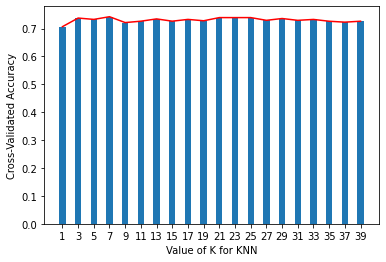

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [21]:
scores=pd.DataFrame()
scores["K_values"]=k_range
scores["Scores"]=k_scores
scores.sort_values(["Scores"],ascending=False)

,K_values,Scores
3,7,0.742544
12,25,0.739397
10,21,0.739371
11,23,0.739344
1,3,0.737731
14,29,0.736092
6,13,0.734664
8,17,0.732919
2,5,0.732919
16,33,0.732813


# build final model

In [22]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.7922077922077922

In [23]:
from pickle import dump
from pickle import load

dump(knn, open('knn.sav', 'wb'))

In [24]:
loaded_model = load(open('knn.sav', 'rb'))
result = loaded_model.score(X, Y)
print(result)

0.7630208333333334


In [25]:
ls


 Volume in drive D is New Volume
 Volume Serial Number is A4F6-F8F8

 Directory of D:\Data science with excelr\Somnath material\knn_demo\knn_demo

05/03/2023  15:31    <DIR>          .
04/03/2023  17:13    <DIR>          ..
04/03/2023  17:13    <DIR>          .ipynb_checkpoints
04/03/2023  17:13             2,023 appupdated.py
04/03/2023  17:13            23,238 diabetes.csv
05/03/2023  15:31            27,868 knn demo.ipynb
05/03/2023  15:33            52,783 knn.sav
04/03/2023  17:13            23,279 pima-indians-diabetes.data (2).csv
               5 File(s)        129,191 bytes
               3 Dir(s)  46,905,794,560 bytes free


# deploy the model

In [26]:
!streamlit run appupdated.py

d:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
Traceback (most recent call last):
  File "d:\anaconda\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\anaconda\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "D:\anaconda\Scripts\streamlit.exe\__main__.py", line 4, in <module>
  File "d:\anaconda\lib\site-packages\streamlit\__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "d:\anaconda\lib\site-packages\streamlit\delta_generator.py", line 42, in <module>
    from streamlit.elements.arrow import ArrowMixin
  File "d:\anaconda\lib\site-packages\streamlit\elements\arrow.py", line 31, in <module>
    from pandas.io.formats.style import Styler
  File "d:\